## ConvNet classifier


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_dataset = pd.read_csv('~/Projects/sign-language-mnist/datasets/sign_mnist_train.csv')
test_dataset = pd.read_csv('~/Projects/sign-language-mnist/datasets/sign_mnist_test.csv')

In [3]:
print(train_dataset.shape)
train_dataset.head(5)

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


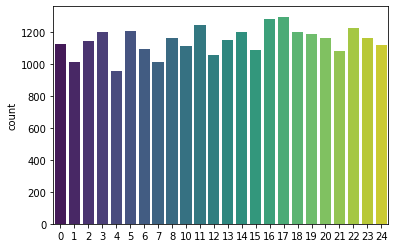

In [4]:
print(np.unique(np.array(train_dataset['label'].values)))

sns.countplot(x=train_dataset['label'].values, palette="viridis")

In [5]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer= LabelBinarizer()
labels = label_binarizer.fit_transform(train_dataset['label'].values)

In [6]:
train_dataset.drop('label', axis = 1, inplace = True)

images = train_dataset.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

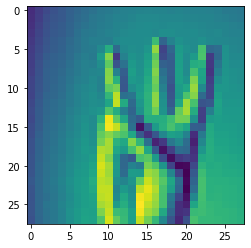

In [7]:
plt.imshow(images[28].reshape(28,28))

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state = 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_validation = x_validation.astype('float32')
                             
x_train /= 255
x_test /= 255
x_validation /= 255
                             
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

print('x shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_validation.shape[0], 'validation samples')

x shape: (13452, 28, 28, 1)
13452 train samples
8237 test samples
5766 validation samples


In [33]:
num_classes = 24
batch_size = 192
epochs = 20

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

model = Sequential()
model.add(Conv2D(364, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [35]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 13452 samples, validate on 8237 samples
Epoch 1/20
13452/13452 [==============================] - 11s 833us/step - loss: 3.0536 - accuracy: 0.1176 - val_loss: 3.6846 - val_accuracy: 0.0664
Epoch 2/20
13452/13452 [==============================] - 10s 762us/step - loss: 1.6561 - accuracy: 0.4919 - val_loss: 1.5369 - val_accuracy: 0.5084
Epoch 3/20
13452/13452 [==============================] - 10s 762us/step - loss: 0.6429 - accuracy: 0.7956 - val_loss: 0.3291 - val_accuracy: 0.8961
Epoch 4/20
13452/13452 [==============================] - 10s 730us/step - loss: 0.2091 - accuracy: 0.9359 - val_loss: 0.2102 - val_accuracy: 0.9380
Epoch 5/20
13452/13452 [==============================] - 10s 735us/step - loss: 0.0908 - accuracy: 0.9747 - val_loss: 0.0190 - val_accuracy: 0.9992
Epoch 6/20
13452/13452 [==============================] - 10s 745us/step - loss: 0.0466 - accuracy: 0.9887 - val_loss: 0.0194 - val_accuracy: 0.9961
Epoch 7/20
13452/13452 [==============================] -

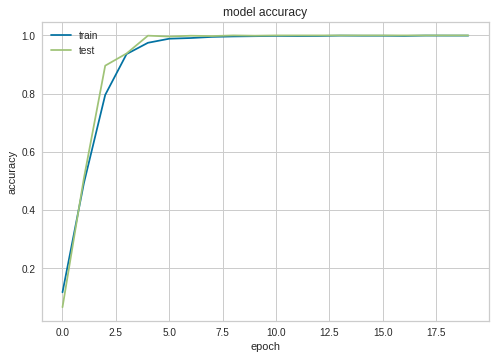

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

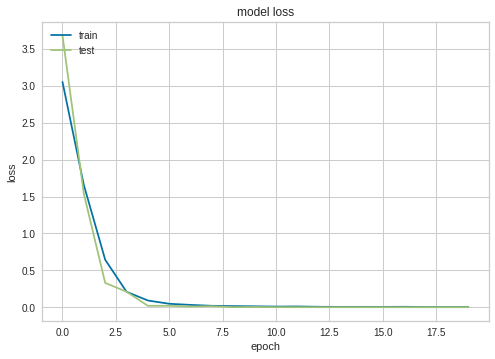

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
score = model.evaluate(x_validation, y_validation, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
#pending roc curve etc

5766/5766 [==============================] - 2s 323us/step
Test loss: 6.353511614794144e-05
Test accuracy: 1.0


## 